# Tratamiento de archivo Games:

# Escoger las columnas a trabajar (de acuerdo a las consultas):

genres, app_name, title, release_date, price, id, developer

# Pedido:
Reviews: sentiment analysis: 
'0' si es malo, 
'1' si es neutral y 
'2' si es positivo. 
Si ausente la reseña escrita, debe tomar el valor de 1.

developer
contenido free en %
año
cant items

user_id
dinero gastado
recomendación en %
cant de items

usuario
horas jugadas por género
año de lanzamiento
horas de juego acumuladas


mejor desarrollador
con más juegos recomendados
por usuario
por año

desarrollador 
reseñas positivas o negativas

ml: coseno de similitud
user-item(usuario): id_usuario y 5 juegos recomendados similares
item-item(producto): id_producto y 5 juegos recomendados similares


In [104]:
# Importar librerías Python 3.11.5
import gzip
import pandas as pd
import json
import numpy as np
import os
import ast
import matplotlib.pyplot as plt


In [105]:
# Cómo abrir un archivo .json desde un comprimido gzip:
data = []
with gzip.open("steam_games.json.gz", "rb") as f:
    for line in f:
        data.append(json.loads(line))

In [106]:
# Dejarlo como DataFrame:
df = pd.DataFrame(data)

In [107]:
# Info de la dataframe:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120445 entries, 0 to 120444
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher     24083 non-null  object
 1   genres        28852 non-null  object
 2   app_name      32133 non-null  object
 3   title         30085 non-null  object
 4   url           32135 non-null  object
 5   release_date  30068 non-null  object
 6   tags          31972 non-null  object
 7   reviews_url   32133 non-null  object
 8   specs         31465 non-null  object
 9   price         30758 non-null  object
 10  early_access  32135 non-null  object
 11  id            32133 non-null  object
 12  developer     28836 non-null  object
dtypes: object(13)
memory usage: 11.9+ MB


ETL: nulos y duplicados:

In [108]:
# Arreglar datos, ETL, desde ya (evitar problemas con los NaNs):
# Cuántos nulos existen en la data?:  88311 filas sin datos
valores_nulos_por_columna = df.isnull().sum()
total_valores_nulos = valores_nulos_por_columna.sum()

print("Total de valores nulos:", total_valores_nulos)
print("\nValores nulos por columna:")
print(valores_nulos_por_columna)

Total de valores nulos: 1168997

Valores nulos por columna:
publisher       96362
genres          91593
app_name        88312
title           90360
url             88310
release_date    90377
tags            88473
reviews_url     88312
specs           88980
price           89687
early_access    88310
id              88312
developer       91609
dtype: int64


In [109]:
# Borramos las celdas con NaNs (más de tres, 88 mil NaNs celdas completas)
df = df.dropna(thresh=3)

In [110]:
# Crear una nueva dataframe con genres, app_name, title, release_date, price, id, developer:
df_games = df[["genres", "app_name", "title", "release_date", "price", "id", "developer"]]

In [111]:
# Se abre la columna genres:
df_exploded = df_games.explode("genres")

In [112]:
df_exploded

,genres,app_name,title,release_date,price,id,developer
88310,Action,Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,4.99,761140,Kotoshiro
88310,Casual,Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,4.99,761140,Kotoshiro
88310,Indie,Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,4.99,761140,Kotoshiro
88310,Simulation,Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,4.99,761140,Kotoshiro
88310,Strategy,Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,4.99,761140,Kotoshiro
...,...,...,...,...,...,...,...
120442,Racing,Russian Roads,Russian Roads,2018-01-04,1.99,610660,Laush Dmitriy Sergeevich
120442,Simulation,Russian Roads,Russian Roads,2018-01-04,1.99,610660,Laush Dmitriy Sergeevich
120443,Casual,EXIT 2 - Directions,EXIT 2 - Directions,2017-09-02,4.99,658870,"xropi,stev3ns"
120443,Indie,EXIT 2 - Directions,EXIT 2 - Directions,2017-09-02,4.99,658870,"xropi,stev3ns"


In [113]:
# Separar columna release_date en tres nuevas columnas:
df_exploded["year"] = df_exploded["release_date"].str[:4]
df_exploded["month"] = df_exploded["release_date"].str[5:7]
df_exploded["day"] = df_exploded["release_date"].str[8:10]

In [114]:
# Reemplazar nulos por 0 en las nuevas columnas:
df_exploded["year"].fillna(0, inplace=True)
df_exploded["month"].fillna(0, inplace=True)
df_exploded["day"].fillna(0, inplace=True)
df_exploded["genres"].fillna(0, inplace=True)

In [115]:
# Cuántos nulos existen en la data posterior al cambio?:
valores_nulos_por_columna = df_exploded.isnull().sum()
total_valores_nulos = valores_nulos_por_columna.sum()

print("Total de valores nulos:", total_valores_nulos)
print("\nValores nulos por columna:")
print(valores_nulos_por_columna)

Total de valores nulos: 10984

Valores nulos por columna:
genres             0
app_name           3
title           2051
release_date    2102
price           3346
id                 3
developer       3479
year               0
month              0
day                0
dtype: int64


In [116]:
# Borrar columna release_year
df_borrada = df_exploded.drop("release_date", axis=1)  # 'axis=1' indicates columna borrada

In [117]:
# Reemplazar nulos por 0 en columna id:
df_borrada['id'].fillna(0, inplace=True)

In [118]:
# Crear una copia del DataFrame original antes de realizar cambios
data_copia = df_borrada.copy()

In [119]:
# Se filtran los tres nulos en id, que fueron cambiados con 0
df_nulos_borrados = data_copia[data_copia['id'] == 0]

In [120]:
# Se verifica que hay un índice 88384 que no tiene información, por lo que se procede a borrar y como no hay más id = 0, se deja tal cual:
df_nulos_borrados

,genres,app_name,title,price,id,developer,year,month,day
88384,0,NaN,NaN,19.99,0,NaN,0,0,0
119271,Action,Batman: Arkham City - Game of the Year Edition,Batman: Arkham City - Game of the Year Edition,19.99,0,"Rocksteady Studios,Feral Interactive (Mac)",2012,09,07
119271,Adventure,Batman: Arkham City - Game of the Year Edition,Batman: Arkham City - Game of the Year Edition,19.99,0,"Rocksteady Studios,Feral Interactive (Mac)",2012,09,07


In [121]:
# Borrar dato 88384: porque no tiene información
df_sin_id_0 = df_nulos_borrados.drop(88384, inplace=True) 

C:\Users\56988\AppData\Local\Temp\ipykernel_8136\1828303241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_id_0 = df_nulos_borrados.drop(88384, inplace=True)


In [122]:
# Verificamos:
df_nulos_borrados = df_nulos_borrados[df_nulos_borrados.index == 88384]

In [123]:
# No existe:
df_nulos_borrados

,genres,app_name,title,price,id,developer,year,month,day


In [124]:
# Verificar si el índice 88384 está presente:
if 88384 in data_copia.index:
    print("El índice 88384 existe en el DataFrame.")
else:
    print("El índice 88384 no existe en el DataFrame.")

El índice 88384 existe en el DataFrame.


In [125]:
# Verificar si el índice 119271 está presente:
if 119271 in data_copia.index:
    print("El índice 119271 existe en el DataFrame.")
else:
    print("El índice 119271 no existe en el DataFrame.")

El índice 119271 existe en el DataFrame.


In [126]:
# Verificamos índice 119271 en la dataframe:
data_copia.loc[119271]

,genres,app_name,title,price,id,developer,year,month,day
119271,Action,Batman: Arkham City - Game of the Year Edition,Batman: Arkham City - Game of the Year Edition,19.99,0,"Rocksteady Studios,Feral Interactive (Mac)",2012,09,07
119271,Adventure,Batman: Arkham City - Game of the Year Edition,Batman: Arkham City - Game of the Year Edition,19.99,0,"Rocksteady Studios,Feral Interactive (Mac)",2012,09,07


In [127]:
# Revisar valores únicos de Fecha "year"
data_copia.year.unique()

array(['2018', '2017', 0, 'Soon', '1997', '1998', '2016', '2006', 'Beta',
       '2005', '2003', '2007', '2002', '2000', '1995', '1996', '1994',
       '2001', '1993', '2004', '1999', '2008', '2009', 'Jun ', '1992',
       '1989', '2010', '2011', 'Oct ', 'Feb ', '2013', '2012', '2014',
       '1983', '1984', '2015', 'Aug ', 'Sep ', '1990', '1988', '1991',
       'Apr ', '1985', '1982', '1987', 'Jul ', 'June', 'Comi', 'Q2 2',
       'TBA', 'When', 'comi', '1981', 'Wint', 'soon', 'Mar ', '14 J',
       'Summ', '1986', 'Spri', 'To b', 'Octo', 'TBD', 'Fall', 'Nov ',
       'Q1 2', 'Dec ', 'Янва', 'Firs', 'H2 2', '21 J', 'Plea', 'earl',
       'SOON', '2021', 'Augu', '1st ', 'Jan ', '预热群5', '0̵1̴', '"""S',
       'Demo', 'Not ', "C'es", '2019', 'Janu', 'Q4 2', 'Earl', 'Data',
       '1975', '1970', 'Play', 'TBA ', 'Rele', 'Dece', 'Comm', 'To B',
       '1980', 'End ', 'Q1 (', 'May ', 'Late', 'Hitt', '15.0', 'Q1, '],
      dtype=object)

In [128]:
# Convertir a fechas y reemplazar valores no válidos con NaN
data_copia["year"] = pd.to_datetime(data_copia["year"], errors="coerce")

In [129]:
# Llenar los NaN con cadenas vacías
data_copia["year"] = data_copia["year"].fillna(" ")

In [130]:
# Cuántos nulos existen en la data, posterior al cambio:
valores_nulos_por_columna = data_copia.isnull().sum()
total_valores_nulos = valores_nulos_por_columna.sum()

print("Total de valores nulos:", total_valores_nulos)
print("\nValores nulos por columna:")
print(valores_nulos_por_columna)

Total de valores nulos: 8879

Valores nulos por columna:
genres          0
app_name        3
title        2051
price        3346
id              0
developer    3479
year            0
month           0
day             0
dtype: int64


In [131]:
# Reemplazar nulos por 0 en developer:
data_copia["developer"].fillna(0, inplace=True)

In [132]:
# En los valores de la columna title, se reemplazan los NaNs con los valores de la columna app_name, siempre y cuando no sea nulo:
data_copia["title"].fillna(data_copia["app_name"], inplace=True)

In [133]:
# En los valores de la columna app_name, se reemplazan los NaNs con los valores de la columna title, siempre y cuando no sea nulo:
data_copia["app_name"].fillna(data_copia["title"], inplace=True)

In [134]:
# Revisar los valores de la columna price:
valores_unicos_price = data_copia["price"].unique()
print(valores_unicos_price)

[4.99 'Free To Play' 'Free to Play' 0.99 2.99 3.99 9.99 18.99 29.99 nan
 'Free' 10.99 1.59 14.99 1.99 59.99 8.99 6.99 7.99 39.99 19.99 7.49 12.99
 5.99 2.49 15.99 1.25 24.99 17.99 61.99 3.49 11.99 13.99 'Free Demo'
 'Play for Free!' 34.99 74.76 1.49 32.99 99.99 14.95 69.99 16.99 79.99
 49.99 5.0 44.99 13.98 29.96 119.99 109.99 149.99 771.71 'Install Now'
 21.99 89.99 'Play WARMACHINE: Tactics Demo' 0.98 139.92 4.29 64.99
 'Free Mod' 54.99 74.99 'Install Theme' 0.89 'Third-party' 0.5 'Play Now'
 299.99 1.29 3.0 15.0 5.49 23.99 49.0 20.99 10.93 1.39
 'Free HITMAN™ Holiday Pack' 36.99 4.49 2.0 4.0 9.0 234.99 1.95 1.5 199.0
 189.0 6.66 27.99 10.49 129.99 179.0 26.99 399.99 31.99 399.0 20.0 40.0
 3.33 199.99 22.99 320.0 38.85 71.7 59.95 995.0 27.49 3.39 6.0 19.95
 499.99 16.06 4.68 131.4 44.98 202.76 1.0 2.3 0.95 172.24 249.99 2.97
 10.96 10.0 30.0 2.66 6.48 19.29 11.15 18.9 2.89 'Play the Demo' 99.0
 87.94 599.0 8.98 9.69 0.49 9.98 9.95 7.0 'Starting at $499.00'
 'Starting at $449.00' 12.8

In [135]:
# Reemplazao de valores de "price":
data_copia["price"] = data_copia["price"].replace("Free to Play", "Free")
data_copia["price"] = data_copia["price"].replace("Free Demo", "Free")
data_copia["price"] = data_copia["price"].replace("Play for Free!", "Free")
data_copia["price"] = data_copia["price"].replace("Install Now", "Free")  
data_copia["price"] = data_copia["price"].replace("Play WARMACHINE: Tactics Demo", "Free")
data_copia["price"] = data_copia["price"].replace("Free Mod", "Free")
data_copia["price"] = data_copia["price"].replace("Install Theme", "Free")
data_copia["price"] = data_copia["price"].replace("Third-party", "Free")
data_copia["price"] = data_copia["price"].replace("Play Now", "Free")
data_copia["price"] = data_copia["price"].replace("Free HITMAN™ Holiday Pack", "Free")
data_copia["price"] = data_copia["price"].replace("Play the Demo", "Free")
data_copia["price"] = data_copia["price"].replace("Free Movie", "Free")  
data_copia["price"] = data_copia["price"].replace("Free to Use", "Free")
data_copia["price"] = data_copia["price"].replace("Starting at $499.00", "499.0")
data_copia["price"] = data_copia["price"].replace("Starting at $449.00", "449.0")

In [136]:
# Filtrar los valores numéricos
numeric_values = pd.to_numeric(data_copia["price"], errors="coerce")  # Convierte a float, ignora errores

In [137]:
# Redondear los valores numéricos a 1 decimal
rounded_values = np.round(numeric_values, decimals=1)

In [138]:
# Reemplazar los valores originales con los redondeados
data_copia["price"] = rounded_values

In [139]:
# Reemplazar solo en la columna "price" los NaNs por "Free"
data_copia["price"] = data_copia["price"].replace(np.nan, "Free")

In [140]:
data_copia["app_name"].unique()

array(['Lost Summoner Kitty', 'Ironbound', 'Real Pool 3D - Poolians', ...,
       'Russian Roads', 'EXIT 2 - Directions', 'Maze Run VR'],
      dtype=object)

In [141]:
# Filtrar las filas con valores nulos en la columna "title" (por ende, "app_name" también):
filas_con_nulos = data_copia[data_copia["title"].isnull()]
print(filas_con_nulos)

       genres app_name title price      id developer                 year  \
88384       0      NaN   NaN  20.0       0         0                        
90890  Action      NaN   NaN  Free  317160         0  2014-01-01 00:00:00   
90890   Indie      NaN   NaN  Free  317160         0  2014-01-01 00:00:00   

      month day  
88384     0   0  
90890    08  26  
90890    08  26  


In [142]:
# En los valores de la columna title y app_name, se rellenan los NaNs con 0:
data_copia["title"].fillna(0, inplace=True)
data_copia["app_name"].fillna(0, inplace=True)

In [143]:
# Cuántos nulos existen en la data, posterior al cambio:
valores_nulos_por_columna = data_copia.isnull().sum()
total_valores_nulos = valores_nulos_por_columna.sum()

print("Total de valores nulos:", total_valores_nulos)
print("\nValores nulos por columna:")
print(valores_nulos_por_columna)

Total de valores nulos: 0

Valores nulos por columna:
genres       0
app_name     0
title        0
price        0
id           0
developer    0
year         0
month        0
day          0
dtype: int64


In [144]:
# Información final de la dataframe Games escogido:
data_copia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74837 entries, 88310 to 120444
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   genres     74837 non-null  object
 1   app_name   74837 non-null  object
 2   title      74837 non-null  object
 3   price      74837 non-null  object
 4   id         74837 non-null  object
 5   developer  74837 non-null  object
 6   year       74837 non-null  object
 7   month      74837 non-null  object
 8   day        74837 non-null  object
dtypes: object(9)
memory usage: 7.7+ MB


EDA: descripción estadística y gráficas:

In [145]:
# Descripción de Distribución de los datos:
data_copia.describe()

,genres,app_name,title,price,id,developer,year,month,day
count,74837,74837,74837,74837.0,74837,74837,74837,74837,74837
unique,23,32095,32096,114.0,32133,10993,44,56,68
top,Indie,AutoTileSet,AutoTileSet,5.0,313320,0,2017-01-01 00:00:00,10,01
freq,15858,11,11,9900.0,11,3479,25352,7683,3401


De acuerdo a la descripción de Frecuencia de los datos, las distribuciones parecen normales (hay que calcular en una próxima oportunidad):

Los géneros de videojuegos que más se repiten son del tipo Indie (que son obras desarrolladas por estudios independientes 
que buscan explorar el medio desde un punto de vista personal, fresco y estéticamente atractivo. Estas creaciones no se 
limitan a un género específico, sino que abarcan una amplia variedad), unas 15858 veces (dentro de 23 géneros).

El nombre de App o de juego que más se repite (11 veces) es AutoTileSet (juego de niveles).

En Precios hay 114 valores únicos. El valor más frecuente es 5.0 dólares, que aparece 9 900 veces. 

El id de usuario que más se repite es 313 320, y aparece unas 11 veces. Hay 32 133 id de usuarios únicos.

Hay 10 993 desarrolladores únicos en la columna “developer”.
El desarrollador más frecuente tiene un valor de 0 (quizás representa valor nulo, sin nombre) y aparece 3 478 veces.

El año en que más se jugó puede ser el 2017, con una frecuencia de 25 352 veces.

El mes que más se repitió fue Octubre y los primeros días de mes (3 401 veces).

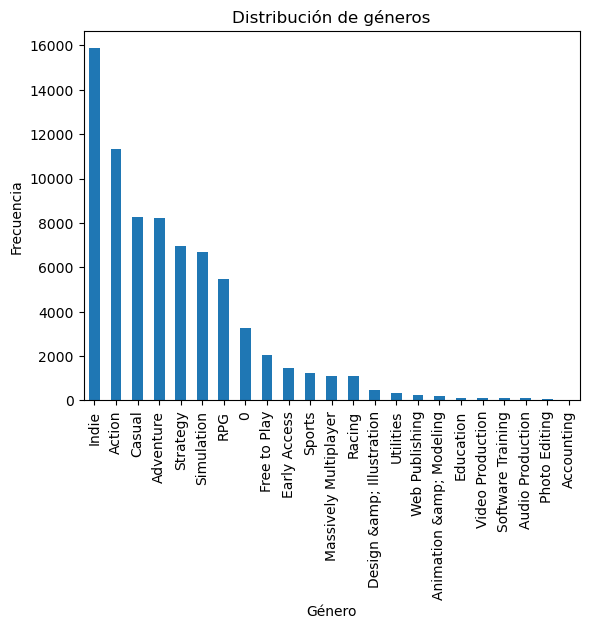

In [146]:
# Graficar un histograma de la columna "genres"
data_copia["genres"].value_counts().plot(kind="bar")
plt.xlabel("Género")
plt.ylabel("Frecuencia")
plt.title("Distribución de géneros")
plt.show()

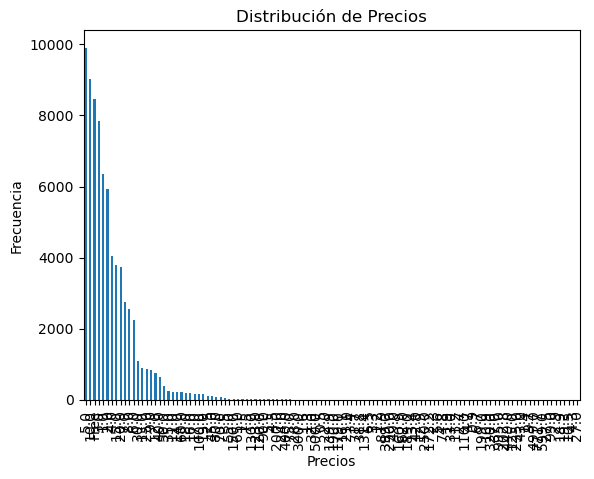

In [147]:
# Graficar un histograma de la columna "price"
data_copia["price"].value_counts().plot(kind="bar")
plt.xlabel("Precios")
plt.ylabel("Frecuencia")
plt.title("Distribución de Precios")
plt.show()

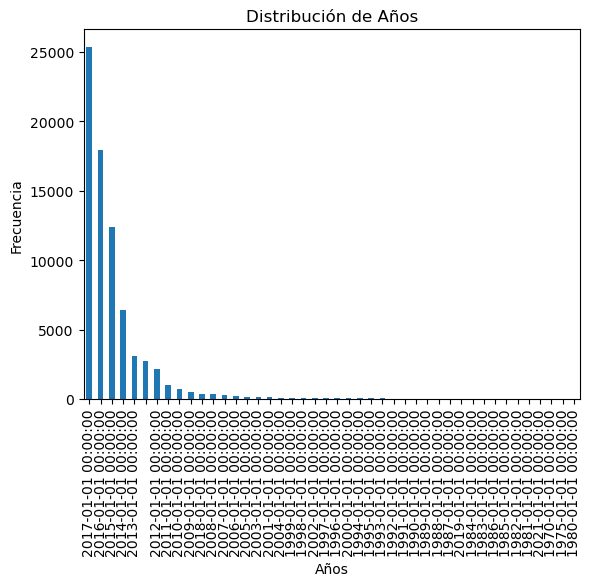

In [148]:
# Graficar un histograma de la columna "year"
data_copia["year"].value_counts().plot(kind="bar")
plt.xlabel("Años")
plt.ylabel("Frecuencia")
plt.title("Distribución de Años")
plt.show()

C:\Users\56988\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35797 (\N{CJK UNIFIED IDEOGRAPH-8BD5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\56988\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24050 (\N{CJK UNIFIED IDEOGRAPH-5DF2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\56988\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21021 (\N{CJK UNIFIED IDEOGRAPH-521D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\56988\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38957 (\N{CJK UNIFIED IDEOGRAPH-982D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\56988\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 263

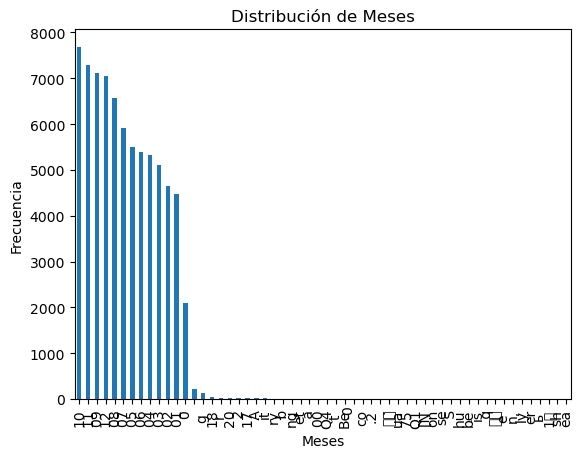

In [149]:
# Graficar un histograma de la columna "month"
data_copia["month"].value_counts().plot(kind="bar")
plt.xlabel("Meses")
plt.ylabel("Frecuencia")
plt.title("Distribución de Meses")
plt.show()

C:\Users\56988\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21551 (\N{CJK UNIFIED IDEOGRAPH-542F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\56988\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22770 (\N{CJK UNIFIED IDEOGRAPH-58F2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\56988\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20104 (\N{CJK UNIFIED IDEOGRAPH-4E88}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


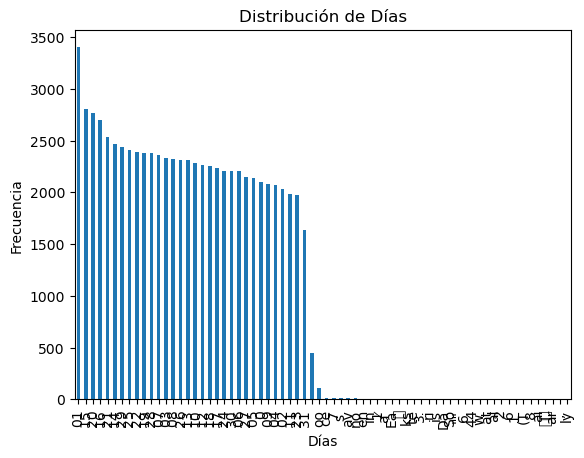

In [150]:
# Graficar un histograma de la columna "day"
data_copia["day"].value_counts().plot(kind="bar")
plt.xlabel("Días")
plt.ylabel("Frecuencia")
plt.title("Distribución de Días")
plt.show()

In [151]:
# Guardamos nueva data en un archivo .csv
data_copia.to_csv('First_Game.csv', index=False)